<a href="https://colab.research.google.com/github/danon6868/BI-stat-course/blob/main/lecture_5_hypothesis_testing/lecture_5_conspect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Z-test

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = 10, 7
plt.rcParams["font.size"] = 14

## Create population

In [ ]:
population = np.random.normal(180, 20, size=100000)
mu = population.mean()
sigma = population.std()

print(f"mu: {mu}, sigma: {sigma}")

mu: 179.9452759059487, sigma: 19.947226598982688


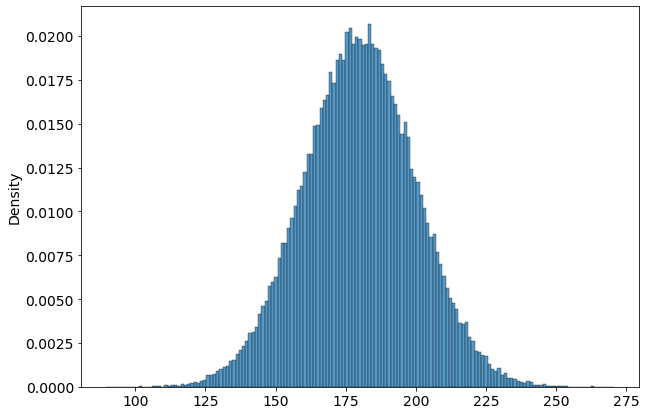

In [ ]:
sns.histplot(population, stat="density");

## Get the sample

In [ ]:
sample_size = 10
sample = np.random.choice(population, size=sample_size)

print(f"mean: {sample.mean()}, std: {sample.std()}")

mean: 184.00574453079534, std: 17.99929430210762


It is okay?

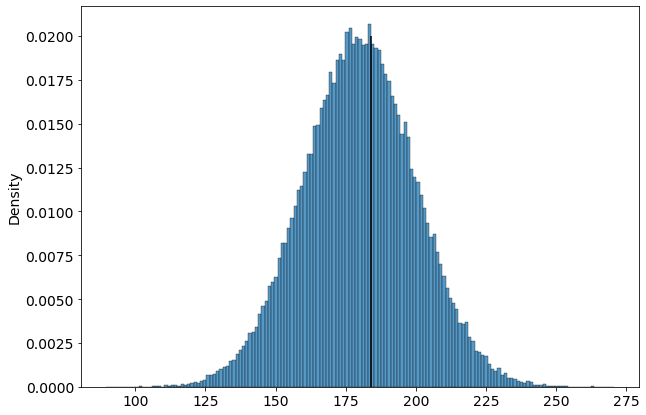

In [ ]:
sns.histplot(population, stat="density")
plt.vlines(sample.mean(), ymin=0, ymax=0.02);

Calculate z statistics and then p-value:

In [ ]:
z_stat = (sample.mean() - mu) / (sigma / np.sqrt(sample_size))
z_stat

0.6437150126334853

In [ ]:
from scipy.stats import norm

In [ ]:
p_value = 1 - norm.cdf(z_stat) # * 2 if two-tailed
p_value

0.2598801265229832

## Why is z-test bad?

Actually we don't know σ

In [ ]:
def calculate_p_value_z_test(sample, mu, sigma=None):
    if sigma is None:
        sigma = sample.std()
    
    sample_size = len(sample)
    z_stat = (sample.mean() - mu) / (sigma / np.sqrt(sample_size))
    p_value = 1 - norm.cdf(z_stat) # * 2 if two-tailed
    
    return p_value

In [ ]:
# Known sigma
n_samples = 10000
p_values = []
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size)
    p_value = calculate_p_value_z_test(sample, mu, sigma=sigma)

    p_values.append(p_value)

p_values = np.array(p_values)

In [ ]:
(p_values < 0.05).mean()

0.0463

In [ ]:
# Unknown sigma
n_samples = 10000
p_values = []
for _ in range(n_samples):
    sample = np.random.choice(population, size=sample_size)
    p_value = calculate_p_value_z_test(sample, mu)

    p_values.append(p_value)

p_values = np.array(p_values)

In [ ]:
(p_values < 0.05).mean()

0.0703

Library version:

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
ztest(sample, value=mu)

(0.216144589043261, 0.8288750440552024)

## Statistical power

In [ ]:
effect_size = 0.1
population_affected = population + effect_size

n_experiments = 1000
sample_size = 1000000
p_values = []
for _ in range(n_experiments):
    sample_1 = np.random.choice(population, size=sample_size)
    sample_2 = np.random.choice(population_affected, size=sample_size)
    _, p_value = ztest(sample_1, sample_2)
    p_values.append(p_value)

p_values = np.array(p_values)

In [ ]:
(p_values < 0.05).mean()

0.948

# t-test

In [ ]:
import pandas as pd

In [ ]:
path_to_data = "drive/MyDrive/teaching/BI_2022_statistics/lecture_5/WorldHappiness_Corruption_2015_2020.csv"
data = pd.read_csv(path_to_data)
data.head()

In [ ]:
from scipy.stats import ttest_ind